In [1]:
# The jupyter script is used to carry out the analysis of the single run
# this is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)
# from the music therapy study using a 12 seconds sliding window
# dataset is resampled due to undersampling during the recording
# ICA, notch and bandpass filtering are implmeneted to mitigate eeg noise
# results: spectogram and average bandpower comparison betwen timepoints per channel per brainwave

In [2]:
from helper import*
import params as cfg

In [3]:
# group-task-time
M = [['m11_1.zip'],['m12_1.zip']]
localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'

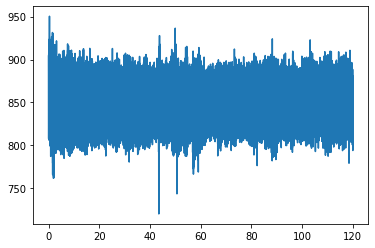

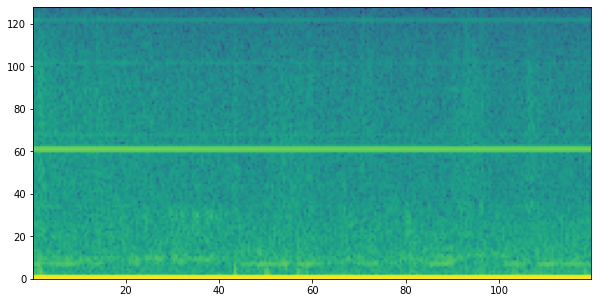

In [7]:
MT11 = zipExtract(M[0],localDir,destDir,"M11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
MT11 = MT11.reshape(MT11.shape[1],MT11.shape[2])
MT12 = zipExtract(M[1],localDir,destDir,"M12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
MT12 = MT12.reshape(MT12.shape[1],MT12.shape[2])
time_s = zipExtract(M[0],localDir,destDir,"M11",cfg.fs,cfg.collection_time,cfg.fs_setting)[2][0]
time_s = time_s.reshape(len(time_s),1)
time_s = time_s[0:int(cfg.collection_time*cfg.fs)]

plt.plot(time_s,MT11[:,0])
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.specgram(MT11[:,0], Fs=256, NFFT=256, noverlap=128, cmap='viridis')
plt.show()

In [ ]:
ica_MT11 = ica(MT11,cfg.fs)
ica_MT12 = ica(MT12,cfg.fs)
psdPlots(ica_MT11,cfg.fs,cfg.channels)
psdPlots(ica_MT12,cfg.fs,cfg.channels)

In [ ]:
filtering = filters()
noc_MT11 = filtering.notch(ica_MT11,cfg.fs)
noc_MT12 = filtering.notch(ica_MT12,cfg.fs)
psdPlots(noc_MT11,cfg.fs,cfg.channels)
psdPlots(noc_MT12,cfg.fs,cfg.channels)


In [ ]:
bandpass_MT11 = filtering.butterBandPass(noc_MT11,cfg.lowcut,cfg.highcut,cfg.fs,)
bandpass_MT12 = filtering.butterBandPass(noc_MT12,cfg.lowcut,cfg.highcut,cfg.fs,)
#psdPlots(bandpass_MT11,cfg.fs,cfg.channels)
#psdPlots(bandpass_MT12,cfg.fs,cfg.channels)
chans = cfg.channels
spectrogramPlot("freqDomain",bandpass_MT11,cfg.fs,time_s,[20,6],cfg.channels,'MT11')
spectrogramPlot("freqDomain",bandpass_MT12,cfg.fs,time_s,[20,6],cfg.channels,'MT12')

In [ ]:
data,title,figsize,nfft,fs,nOverlap,subTitles = bandpass_MT11,'Music Therapy Group Task 1: T1 v T2',(10,6),1024,256,1024/2,['TP9-T1','AF7-T1','AF8-T1','TP10-T1']

eeg = data
sr = fs
WinLength = int(0.5*sr) 
step = int(0.025*sr) 
myparams = dict(nperseg = WinLength, noverlap = WinLength-step, return_onesided=True, mode='magnitude')
f_1, nseg_1, Sxx_1 = signal.spectrogram(x = eeg[:,0], fs=sr, **myparams)
f_2, nseg_2, Sxx_2 = signal.spectrogram(x = eeg[:,1], fs=sr, **myparams)
f_3, nseg_3, Sxx_3 = signal.spectrogram(x = eeg[:,2], fs=sr, **myparams)
f_4, nseg_4, Sxx_4 = signal.spectrogram(x = eeg[:,3], fs=sr, **myparams)

fig, ax = plt.subplots(2,4, figsize = (40,15), constrained_layout=True)
fig.suptitle(title)
ax[0,0].plot(time_s, eeg[:,0], lw = 1, color='C0')
ax[0,1].plot(time_s, eeg[:,1], lw = 1, color='C1')
ax[0,2].plot(time_s, eeg[:,2], lw = 1, color='C2')
ax[0,3].plot(time_s, eeg[:,3], lw = 1, color='C3')
ax[0,0].set_ylabel('Amplitude ($\mu V$)')
ax[0,1].set_ylabel('Amplitude ($\mu V$)')
ax[0,2].set_ylabel('Amplitude ($\mu V$)')
ax[0,3].set_ylabel('Amplitude ($\mu V$)')
ax[0,0].set_title(subTitles[0])
ax[0,1].set_title(subTitles[1])
ax[0,2].set_title(subTitles[2])
ax[0,3].set_title(subTitles[3])
ax[1,0].set(xlabel='Time (s)', ylabel='Frequency (Hz)')
ax[1,1].set(xlabel='Time (s)', ylabel='Frequency (Hz)')
ax[1,2].set(xlabel='Time (s)', ylabel='Frequency (Hz)')
ax[1,3].set(xlabel='Time (s)', ylabel='Frequency (Hz)')
X1,X2,X3,X4 = nseg_1,nseg_2,nseg_3,nseg_4
Y1,Y2,Y3,Y4 = f_1,f_2,f_3,f_4
Z1,Z2,Z3,Z4 = Sxx_1,Sxx_2,Sxx_3,Sxx_4
levels = 45
spectrum = ax[1,0].contourf(X1,Y1,Z1,levels, cmap='jet')#,'linecolor','none')
spectrum = ax[1,1].contourf(X2,Y2,Z2,levels, cmap='jet')#,'linecolor','none')
spectrum = ax[1,2].contourf(X3,Y3,Z3,levels, cmap='jet')#,'linecolor','none')
spectrum = ax[1,3].contourf(X4,Y4,Z4,levels, cmap='jet')#,'linecolor','none')
cbar = plt.colorbar(spectrum)#, boundaries=np.linspace(0,1,5))
cbar.ax.set_ylabel('Amplitude (dB)', rotation=90)





In [ ]:
eeg = noc_MT11[:,2]
sr = cfg.fs
WinLength = int(0.5*sr) 
step = int(0.025*sr) 
myparams = dict(nperseg = WinLength, noverlap = WinLength-step, return_onesided=True, mode='magnitude')
f, nseg, Sxx = signal.spectrogram(x = eeg, fs=sr, **myparams)
fig, ax = plt.subplots(2,1, figsize = (16,8), constrained_layout=True)

ax[0].plot(time_s, eeg, lw = 1, color='C0')
ax[0].set_ylabel('Amplitude ($\mu V$)')
ax[0].set_title('EEG signal')
ax[1].set(xlabel='Time (s)', ylabel='Frequency (Hz)')
nsteps = int(np.floor ((eeg.size - WinLength)/step))
# spectrum is a ContourSet object
dt = 120/nsteps # 120 seconds in number of steps
X = nseg
Y = f
Z = Sxx
levels = 45
spectrum = ax[1].contourf(X,Y,Z,levels, cmap='jet')#,'linecolor','none')

# get the colormap
cbar = plt.colorbar(spectrum)#, boundaries=np.linspace(0,1,5))
cbar.ax.set_ylabel('Amplitude (dB)', rotation=90)
#cbar.set_ticks(np.arange(0,50,10))

In [ ]:
# compute power spectrum of each window per channel
delta_low = cfg.brainwaves['delta'][0]
delta_high = cfg.brainwaves['delta'][1]
theta_low = cfg.brainwaves['theta'][0]
theta_high = cfg.brainwaves['theta'][1]
alpha_low = cfg.brainwaves['alpha'][0]
alpha_high = cfg.brainwaves['alpha'][1]
beta_low = cfg.brainwaves['beta'][0]
beta_high = cfg.brainwaves['beta'][1]
gamma_low = cfg.brainwaves['gamma'][0]
gamma_high = cfg.brainwaves['gamma'][1]

In [ ]:
# compute average band power for timepoint 1

#   delta
delta_M11 = avgBandPower(bandpass_MT11,cfg.fs,delta_low,delta_high)
delta_M12 = avgBandPower(bandpass_MT12,cfg.fs,delta_low,delta_high) 

#   theta
theta_M11 = avgBandPower(bandpass_MT11,cfg.fs,theta_low,theta_high)
theta_M12 = avgBandPower(bandpass_MT12,cfg.fs,theta_low,theta_high)

#   alpha
alpha_M11 = avgBandPower(bandpass_MT11,cfg.fs,alpha_low,alpha_high)
alpha_M12 = avgBandPower(bandpass_MT12,cfg.fs,alpha_low,alpha_high)

#   beta
beta_M11 = avgBandPower(bandpass_MT11,cfg.fs,beta_low,beta_high)
beta_M12 = avgBandPower(bandpass_MT12,cfg.fs,beta_low,beta_high)

#   gamma
gamma_M11 = avgBandPower(bandpass_MT11,cfg.fs,gamma_low,gamma_high)
gamma_M12 = avgBandPower(bandpass_MT12,cfg.fs,gamma_low,gamma_high)

In [ ]:
sw_M11 = slidingWindow(bandpass_MT11,time_s,1,1)
tp9 = sw_M11[0,:,:]
af7 = sw_M11[1,:,:]
af8 = sw_M11[2,:,:]
#tp9 = tp9.reshape(tp9.shape[1],tp9.shape[2])
delta_tp9 = avgBandPower(tp9.T,cfg.fs,delta_low,delta_high)
delta_tp9 = np.sum(delta_tp9)
delta_af7 = avgBandPower(af7.T,cfg.fs,delta_low,delta_high)
#delta_af7 = np.sum(delta_af7)
delta_af8 = avgBandPower(af8.T,cfg.fs,delta_low,delta_high)
delta_af8 = np.sum(delta_af8)